In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
dataset = pd.read_csv('Resources/dataset.csv')
dataset.head()

,age_c,assess_c,cancer_c,compfilm_c,density_c,famhx_c,hrt_c,prvmam_c,biophx_c,mammtype,CaTypeO,bmi_c,ptid
0,62,1,0,1,2,0,0,1,0,1,8,24.023544,1
1,65,1,0,1,4,0,0,1,0,1,8,-99.000000,2
2,69,0,0,1,2,0,0,1,0,1,8,29.052429,3
3,64,2,0,1,2,0,0,1,0,1,8,-99.000000,4
4,63,3,0,1,2,0,0,1,1,1,8,33.729523,5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_c       40000 non-null  int64  
 1   assess_c    40000 non-null  int64  
 2   cancer_c    40000 non-null  int64  
 3   compfilm_c  40000 non-null  int64  
 4   density_c   40000 non-null  int64  
 5   famhx_c     40000 non-null  int64  
 6   hrt_c       40000 non-null  int64  
 7   prvmam_c    40000 non-null  int64  
 8   biophx_c    40000 non-null  int64  
 9   mammtype    40000 non-null  int64  
 10  CaTypeO     40000 non-null  int64  
 11  bmi_c       40000 non-null  float64
 12  ptid        40000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.0 MB


In [4]:
dataset.describe()

,age_c,assess_c,cancer_c,compfilm_c,density_c,famhx_c,hrt_c,prvmam_c,biophx_c,mammtype,CaTypeO,bmi_c,ptid
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,69.555850,1.203450,0.006475,1.903450,2.229725,0.219875,0.504925,1.108200,0.444675,1.500000,7.959750,-46.164809,18376.250225
std,7.202974,0.575775,0.080207,2.589304,0.716355,0.762853,1.854633,0.959435,1.309191,0.500006,0.499686,62.225752,10601.991024
min,60.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-99.000000,1.000000
25%,63.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.000000,-99.000000,9202.750000
50%,68.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.500000,8.000000,-99.000000,18392.500000
75%,75.000000,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,2.000000,8.000000,24.691544,27562.250000
max,89.000000,5.000000,1.000000,9.000000,4.000000,9.000000,9.000000,9.000000,9.000000,2.000000,8.000000,71.721314,36714.000000


In [5]:
dataset.isna().sum()

age_c         0
assess_c      0
cancer_c      0
compfilm_c    0
density_c     0
famhx_c       0
hrt_c         0
prvmam_c      0
biophx_c      0
mammtype      0
CaTypeO       0
bmi_c         0
ptid          0
dtype: int64

In [6]:
# replace Nil values with 9
#dataset['bmi_c'] = dataset['bmi_c'].replace([-99], 9)
#Convert 8 placeholder to 0 
dataset['CaTypeO'] = dataset['CaTypeO'].replace([8], 0)
# Merge positive cancer diagnosis, versus positive cancer types
dataset['CaTypeO'] = dataset['CaTypeO'].replace([2], 1)
#drop null values identified by the numeric value '9'
dataset = dataset[dataset.compfilm_c != 9]
dataset = dataset[dataset.famhx_c != 9]
dataset = dataset[dataset.hrt_c != 9]
dataset = dataset[dataset.prvmam_c != 9]
dataset = dataset[dataset.biophx_c != 9]
dataset = dataset[dataset.bmi_c != 9]
#delete ptid column
del dataset['ptid']
#Print info again 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32772 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_c       32772 non-null  int64  
 1   assess_c    32772 non-null  int64  
 2   cancer_c    32772 non-null  int64  
 3   compfilm_c  32772 non-null  int64  
 4   density_c   32772 non-null  int64  
 5   famhx_c     32772 non-null  int64  
 6   hrt_c       32772 non-null  int64  
 7   prvmam_c    32772 non-null  int64  
 8   biophx_c    32772 non-null  int64  
 9   mammtype    32772 non-null  int64  
 10  CaTypeO     32772 non-null  int64  
 11  bmi_c       32772 non-null  float64
dtypes: float64(1), int64(11)
memory usage: 3.3 MB


In [7]:
#Encode existing features
dataset['density_c'].value_counts()

#Not needed, breast tissue is already encoded in chronological order... 

2    17474
3     9652
1     4551
4     1095
Name: density_c, dtype: int64

In [8]:
#Analyze BMI 
dataset['bmi_c'].value_counts()
#Unable to further categorize based on wide array of data 

-99.000000    17613
 24.799606      117
 25.606049      116
 27.463623      109
 28.342407      100
              ...  
 23.012573        1
 55.270538        1
 29.239151        1
 30.384354        1
 39.135651        1
Name: bmi_c, Length: 1848, dtype: int64

In [9]:
# label encode categorical columns

lblEncoder_state = LabelEncoder()
lblEncoder_state.fit(dataset['assess_c'])
dataset['assess_c'] = lblEncoder_state.transform(dataset['assess_c'])

lblEncoder_cons = LabelEncoder()
lblEncoder_cons.fit(dataset['cancer_c'])
dataset['cancer_c'] = lblEncoder_cons.transform(dataset['cancer_c'])

lblEncoder_name = LabelEncoder()
lblEncoder_name.fit(dataset['compfilm_c'])
dataset['compfilm_c'] = lblEncoder_name.transform(dataset['compfilm_c'])

lblEncoder_party = LabelEncoder()
lblEncoder_party.fit(dataset['density_c'])
dataset['density_c'] = lblEncoder_party.transform(dataset['density_c'])

lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['famhx_c'])
dataset['famhx_c'] = lblEncoder_symbol.transform(dataset['famhx_c'])

lblEncoder_gender = LabelEncoder()
lblEncoder_gender.fit(dataset['hrt_c'])
dataset['hrt_c'] = lblEncoder_gender.transform(dataset['hrt_c'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['prvmam_c'])
dataset['prvmam_c'] = lblEncoder_category.transform(dataset['prvmam_c'])

lblEncoder_edu = LabelEncoder()
lblEncoder_edu.fit(dataset['bmi_c'])
dataset['bmi_c'] = lblEncoder_edu.transform(dataset['bmi_c'])

lblEncoder_state = LabelEncoder()
lblEncoder_state.fit(dataset['biophx_c'])
dataset['biophx_c'] = lblEncoder_state.transform(dataset['biophx_c'])

lblEncoder_state = LabelEncoder()
lblEncoder_state.fit(dataset['mammtype'])
dataset['mammtype'] = lblEncoder_state.transform(dataset['mammtype'])

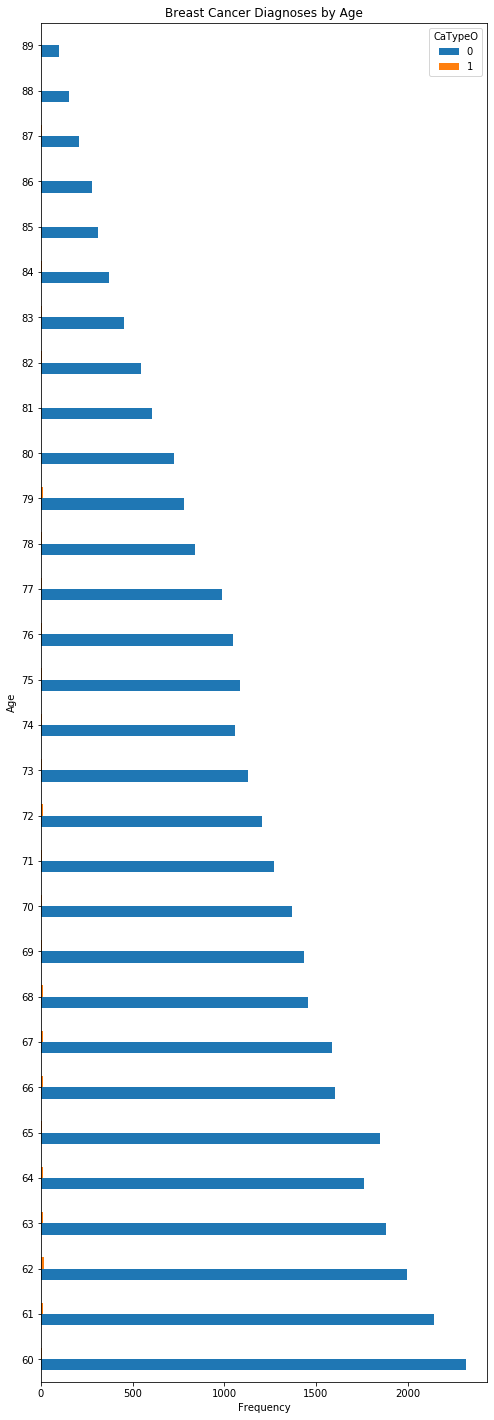

In [10]:
#At what age is Heart Disease shows up more? 
pd.crosstab(dataset.age_c,dataset.CaTypeO).plot(kind="barh",figsize=(8,25))
plt.title('Breast Cancer Diagnoses by Age')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

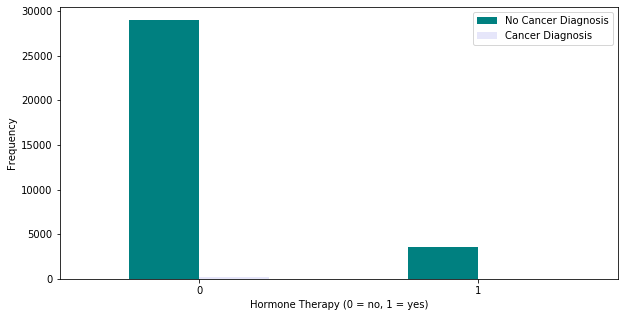

In [11]:
pd.crosstab(dataset.hrt_c,dataset.CaTypeO).plot(kind="bar",figsize=(10,5),color=['teal','lavender' ])
plt.xlabel('Hormone Therapy (0 = no, 1 = yes)')
plt.xticks(rotation=0)
plt.legend(["No Cancer Diagnosis", "Cancer Diagnosis"])
plt.ylabel('Frequency')
plt.show()

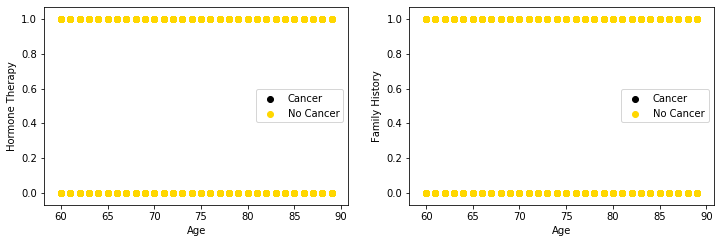

In [12]:
#How does age effect the parameters of heart disease?

#Hormone Therapy
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(x=dataset.age_c[dataset.CaTypeO==1],y=dataset.hrt_c[dataset.CaTypeO==1],c='black')
plt.scatter(x=dataset.age_c[dataset.CaTypeO==0],y=dataset.hrt_c[dataset.CaTypeO==0],c='gold')
plt.xlabel('Age')
plt.ylabel('Hormone Therapy')
plt.legend(['Cancer','No Cancer'])

#Family History
plt.subplot(2,2,2)
plt.scatter(x=dataset.age_c[dataset.CaTypeO==1],y=dataset.famhx_c[dataset.CaTypeO==1],c='black')
plt.scatter(x=dataset.age_c[dataset.CaTypeO==0],y=dataset.famhx_c[dataset.CaTypeO==0],c='gold')
plt.xlabel('Age')
plt.ylabel('Family History')
plt.legend(['Cancer','No Cancer'])


In [13]:
target = dataset["CaTypeO"]
target_names = ["negative", "positive"]

In [14]:
data = dataset.drop("CaTypeO", axis=1)
feature_names = data.columns
data.head()

,age_c,assess_c,cancer_c,compfilm_c,density_c,famhx_c,hrt_c,prvmam_c,biophx_c,mammtype,bmi_c
0,62,1,0,1,1,0,0,1,0,0,564
1,65,1,0,1,3,0,0,1,0,0,0
2,69,0,0,1,1,0,0,1,0,0,967
3,64,2,0,1,1,0,0,1,0,0,0
4,63,3,0,1,1,0,0,1,1,0,1291


In [15]:
# separate train features and label
y = target
X = data
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [16]:
# train and test knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
print("Testing Accuracy is: ", knn.score(X_test, y_test)*100, "%")

Testing Accuracy is:  99.43854509947516 %


In [17]:
# scaling values into 0-1 range
#scaler = MinMaxScaler(feature_range=(0, 1))
#features = [
#    'assess_c', 'cancer_c', 'compfilm_c', 'density_c', 'famhx_c', 'hrt_c', 'prvmam_c', 'prvmam_c', 'bmi_c', 'biophx_c', 'mammtype']
#dataset[features] = scaler.fit_transform(dataset[features])

from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

#TEST ACCURACY AGAIN
# separate train features and label
y = target
X = data
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# train and test knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
print("Testing Accuracy is: ", knn.score(X_test, y_test)*100, "%")

Testing Accuracy is:  99.43854509947516 %


In [18]:
dataset.CaTypeO.value_counts()

0    32577
1      195
Name: CaTypeO, dtype: int64

In [19]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
 # Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 0.994


In [21]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
 # Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 1.000


In [23]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
 # Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 0.994


In [25]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
 # Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 1.000


In [27]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
 # Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 1.000


In [29]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
 # Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 1.000


In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[8147,    0],
       [   0,   46]], dtype=int64)